In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os
from natsort import natsorted
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib
from matplotlib import pyplot as plt
import datetime
import pytz
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import lightgbm as lgb

In [2]:
save_dir = "./Image"
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'  

In [3]:
data_save_dir = "./Data"

In [4]:
with open(data_save_dir+'/train_x.pkl', 'rb') as file:
    x_train = pickle.load(file)
with open(data_save_dir+'/train_y.pkl', 'rb') as file:
    y_train = pickle.load(file)
with open(data_save_dir+'/test_x.pkl', 'rb') as file:
    x_test = pickle.load(file)
with open(data_save_dir+'/test_y.pkl', 'rb') as file:
    y_test = pickle.load(file)

In [5]:
x_train.shape,y_train.shape

((9486, 463), (9486, 100))

In [6]:
x_test.shape,y_test.shape

((2042, 463), (2042, 100))

In [7]:
y_train.columns[1]

'y_step_2'

In [8]:
y_train[y_train.columns[1]]

timestamp
2022-05-31 03:08:16.725000+00:00     0.0
2022-05-31 03:09:16.742000+00:00     0.0
2022-05-31 03:09:16.749000+00:00     0.0
2022-05-31 03:10:06.666000+00:00     0.0
2022-05-31 03:10:16.734000+00:00   -85.0
                                    ... 
2022-06-02 23:52:50.469000+00:00   -43.5
2022-06-02 23:53:53.001000+00:00   -12.0
2022-06-02 23:53:53.001000+00:00     0.5
2022-06-02 23:58:16.455000+00:00     4.5
2022-06-02 23:58:46.484000+00:00   -30.0
Name: y_step_2, Length: 9486, dtype: float64

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
x_train.columns

Index(['signed_side', 'size', 'price', 'grossValue', 'homeNotional',
       'foreignNotional', 'Midprice_variance', 'Signed_trade_size_variance',
       'Bid_ask_imbalance', 'Bid_ask_imbalance_muti',
       ...
       'diff_price_step_1', 'diff_price_step_2', 'diff_price_step_3',
       'diff_price_step_4', 'diff_price_step_5', 'diff_price_step_6',
       'diff_price_step_7', 'diff_price_step_8', 'diff_price_step_9',
       'diff_price_step_10'],
      dtype='object', length=463)

In [11]:
gbm = lgb.LGBMRegressor(objective='regression',
                        n_estimators = 100,
                        metric='r2',
                         num_leaves = 31,
                         max_depth = 8,
                         learning_rate = 0.1,
#                          device = 'gpu',
#                         gpu_platform_id = 0,
#                         gpu_device_id = 0
                        )

In [12]:
gbm.fit(x_train, y_train[y_train.columns[0]])

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


LGBMRegressor(max_depth=8, metric='r2', objective='regression')

首先调整n_estimators参数

In [13]:
parameters = {
    'n_estimators': [100,200,300,400]
}

gbm = lgb.LGBMRegressor(objective='regression',
                        n_estimators = 200,
                        metric='r2',
                         num_leaves = 16,
                         max_depth = 8,
                         learning_rate = 0.1 
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='r2', cv=2,verbose=1)

gsearch.fit(x_train, y_train[y_train.columns[0]])

print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

开始搜索
Fitting 2 folds for each of 4 candidates, totalling 8 fits


KeyboardInterrupt: 

调整学习率

In [ ]:
params = {
    'boosting_type': 'gbdt', 
    'objective': 'regression', 

    'learning_rate': 0.1, 
    'num_leaves': 50, 
    'max_depth': 6,

    'subsample': 0.8, 
    'colsample_bytree': 0.8, 
    }

In [11]:
parameters = {
    'learning_rate': [0.08,0.09,0.1,0.11]
}

gbm = lgb.LGBMRegressor(objective='regression',
                        n_estimators = 100,
                        metric='r2',
                         num_leaves = 16,
                         max_depth = 8,
                         learning_rate = 0.1 
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='r2', cv=2,verbose=1)
print("开始搜索")
gsearch.fit(x_train, y_train[y_train.columns[0]])
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

开始搜索
Fitting 2 folds for each of 4 candidates, totalling 8 fits
参数的最佳取值:{'learning_rate': 0.08}
最佳模型得分:0.1571880926312551
[0.15718809 0.13379117 0.12664599 0.13071345]
[{'learning_rate': 0.08}, {'learning_rate': 0.09}, {'learning_rate': 0.1}, {'learning_rate': 0.11}]


In [12]:
parameters = {
    'learning_rate': [0.08,0.09,0.07,0.06]
}

gbm = lgb.LGBMRegressor(objective='regression',
                        n_estimators = 100,
                        metric='r2',
                         num_leaves = 16,
                         max_depth = 8,
                         learning_rate = 0.1 
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='r2', cv=2,verbose=1)

gsearch.fit(x_train, y_train[y_train.columns[0]])

print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

开始搜索
Fitting 2 folds for each of 4 candidates, totalling 8 fits
参数的最佳取值:{'learning_rate': 0.06}
最佳模型得分:0.16161087412603736
[0.15718809 0.13379117 0.14896333 0.16161087]
[{'learning_rate': 0.08}, {'learning_rate': 0.09}, {'learning_rate': 0.07}, {'learning_rate': 0.06}]


调整最大深度

In [14]:
parameters = {
    'max_depth': [5,6,7,8,9]
}

gbm = lgb.LGBMRegressor(objective='regression',
                        n_estimators = 100,
                        metric='r2',
                         num_leaves = 16,
                         max_depth = 8,
                         learning_rate = 0.06 
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='r2', cv=2,verbose=1)
print("开始搜索")
gsearch.fit(x_train, y_train[y_train.columns[0]])
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

开始搜索
Fitting 2 folds for each of 5 candidates, totalling 10 fits
参数的最佳取值:{'max_depth': 6}
最佳模型得分:0.18169394705896652
[0.16805492 0.18169395 0.17488181 0.16161087 0.16995685]
[{'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}]


## 建立模型

In [14]:
from tqdm import tqdm

In [15]:
%time

model = lgb.LGBMRegressor(objective='regression',
                        n_estimators = 100,
                        metric='r2',
                         num_leaves = 16,
                         max_depth = 6,
                         learning_rate = 0.06 
                        )

ans_r2_train = [0]*100
ans_r2_test = [0]*100
for i in tqdm(range(100)):
    # 训练模型
    model.fit(x_train,y_train[y_train.columns[i]])
#     # 测试
#     print(r2_score(y_train[y_train.columns[i]],model.predict(x_train)))
#     # 测试
#     print(r2_score(model.predict(x_test),y_test[y_test.columns[i]]))
    ans_r2_train[i] = r2_score(y_train[y_train.columns[i]],model.predict(x_train))
    ans_r2_test[i] = r2_score(y_test[y_test.columns[i]],model.predict(x_test))

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Wall time: 0 ns


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:32<00:00,  5.13s/it]


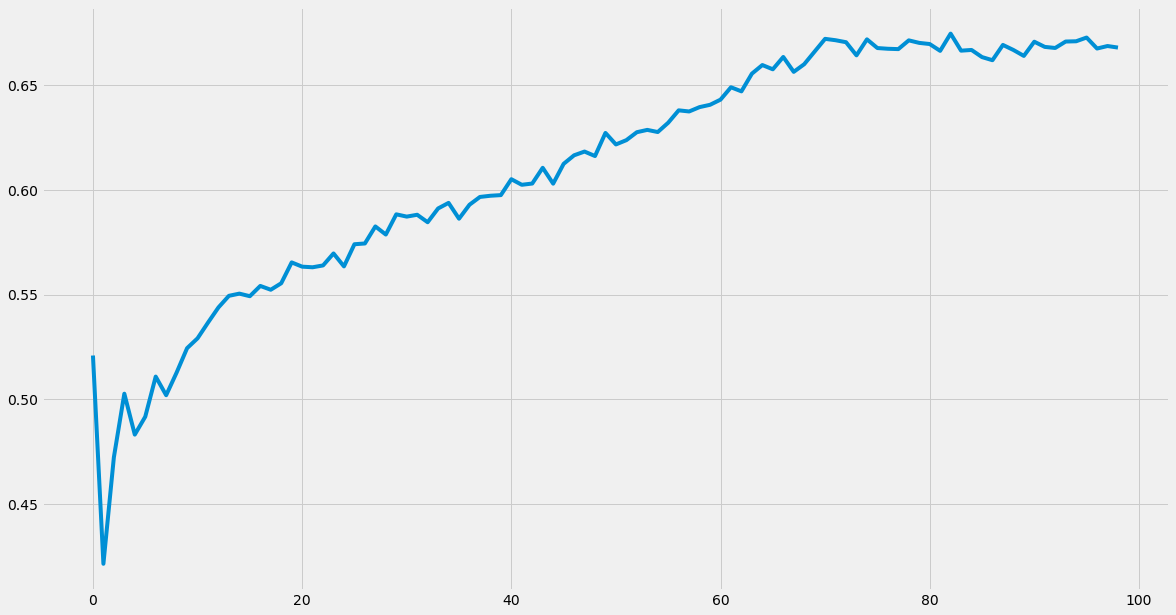

In [16]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    plt.plot(ans_r2_train[1:])
    fig_file = os.path.join(save_dir, "05-LGBM-train-r2-short-best.png")
#     plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
#     plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
#                 pil_kwargs={"compression": "tiff_lzw"})
#     plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

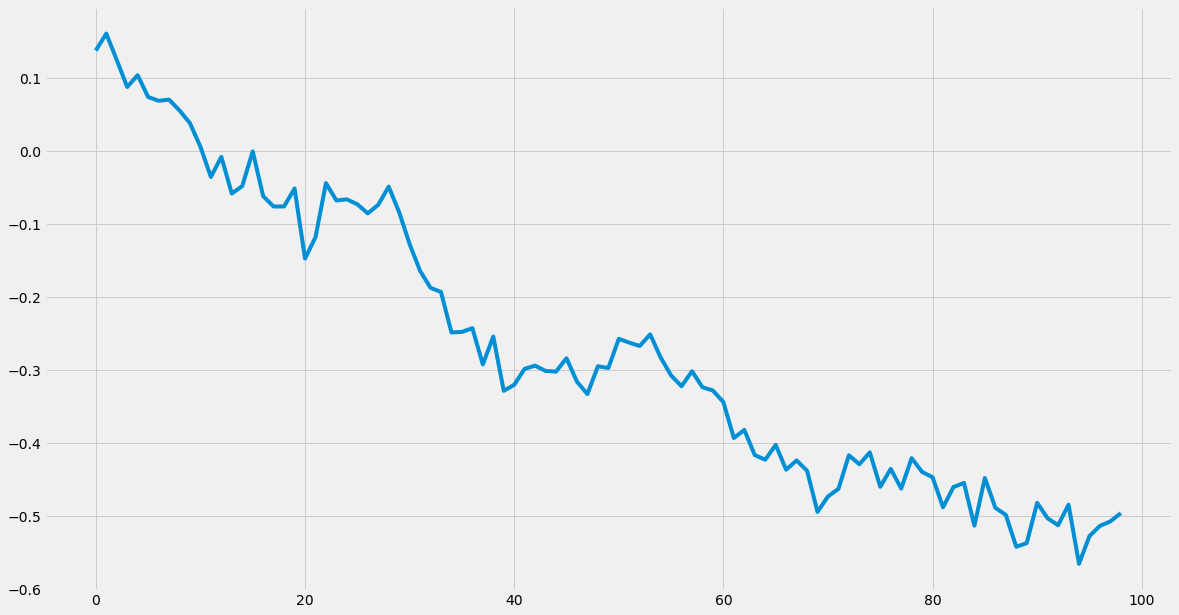

In [17]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    plt.plot(ans_r2_test[1:])
    fig_file = os.path.join(save_dir, "05-LGBM-test-r2-short-best.png")
#     plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
#     plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
#                 pil_kwargs={"compression": "tiff_lzw"})
#     plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

In [ ]:
with open('./LGBM训练结果.pkl', 'wb') as file:
    pickle.dump(ans_r2_test, file)

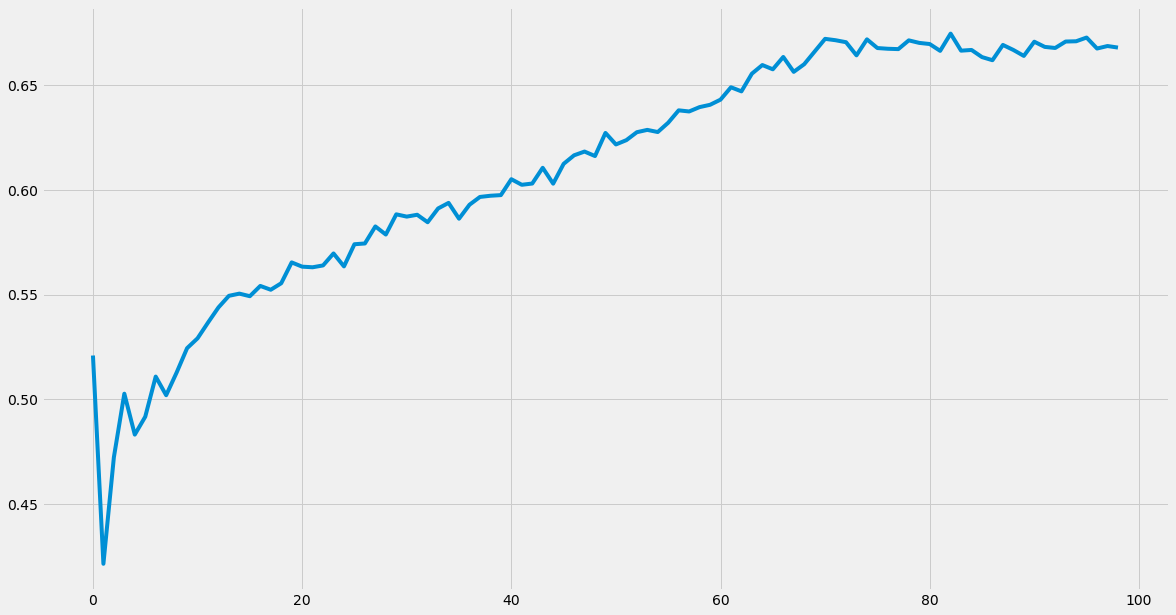

In [22]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    plt.plot(ans_r2_train[1:])
    fig_file = os.path.join(save_dir, "05-LGBM-train-r2-short-best.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

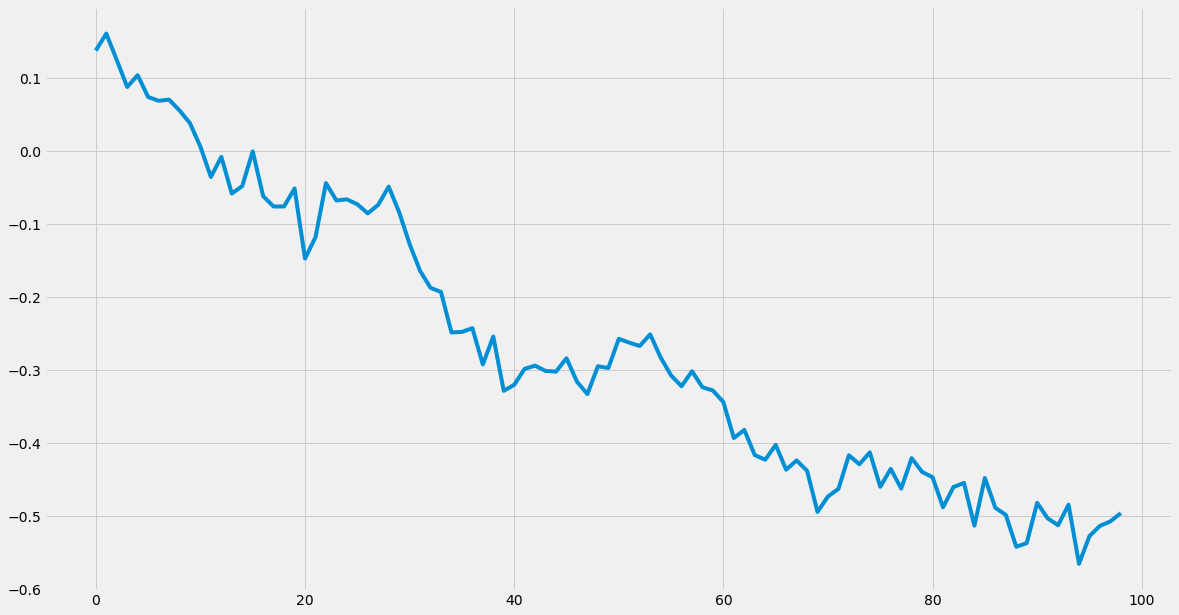

In [23]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    plt.plot(ans_r2_test[1:])
    fig_file = os.path.join(save_dir, "05-LGBM-test-r2-short-best.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()